## Importing libraries and dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sns.set_style("ticks")

In [5]:
train_path = ("/advertising.csv")

In [6]:
df = pd.read_csv(train_path)

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df.head(2)

,daily time spent on site,age,area income,daily internet usage,ad topic line,city,male,country,timestamp,clicked on ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [11]:
df.shape

(1000, 10)

In [12]:
df["age"].mean()

36.009

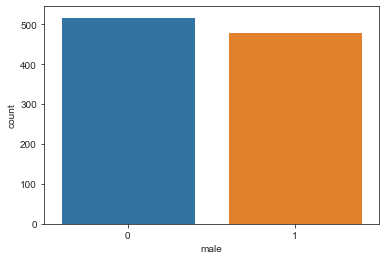

In [13]:
sns.countplot(x="male", data = df);

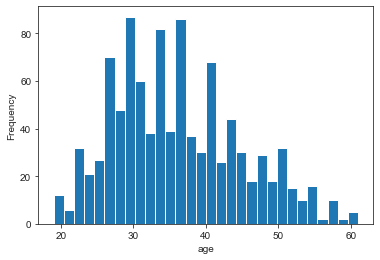

In [14]:
df["age"].plot.hist(bins = 30);
plt.xlabel("age");

In [15]:
df.describe()

,daily time spent on site,age,area income,daily internet usage,male,clicked on ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


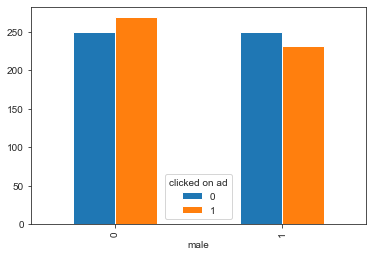

In [16]:
(df
.pivot_table(index = "male",
             columns ="clicked on ad",
             values = "country",
             aggfunc = "count")

).plot.bar();

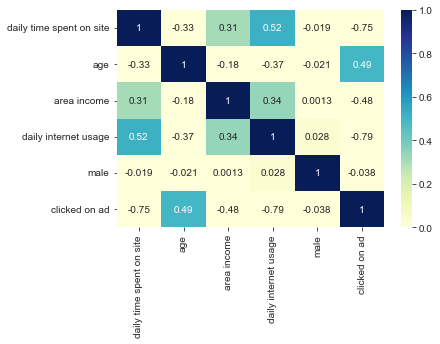

In [20]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", vmin=0, vmax=1, annot=True)

In [81]:
df.head(2)

,daily time spent on site,age,area income,daily internet usage,ad topic line,city,male,country,timestamp,clicked on ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [98]:
df.drop(["ad topic line", "city", "country", "timestamp"], axis = 1, inplace = True)

In [99]:
df.head(2)

,daily time spent on site,age,area income,daily internet usage,male,clicked on ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0


In [101]:
X = df.drop("clicked on ad", axis = 1)
y = df["clicked on ad"]

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
logmodel = LogisticRegression()

In [106]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [108]:
y_predicted = logmodel.predict(X_test)

In [109]:
from sklearn.metrics import classification_report

In [110]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [112]:
sns.set_style("ticks")  #reverting the seaborn style to default matlplotlib style

In [113]:
print(confusion_matrix(y_test, y_predicted))

[[149   8]
 [ 14 129]]


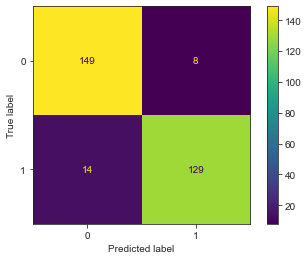

In [114]:
cm = confusion_matrix(y_test, y_predicted, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot();